In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [18]:
twitter = pd.read_csv('labeled_daily_all_tesla_tweets.csv', index_col=0, parse_dates=True)
feature_cols = twitter.keys()

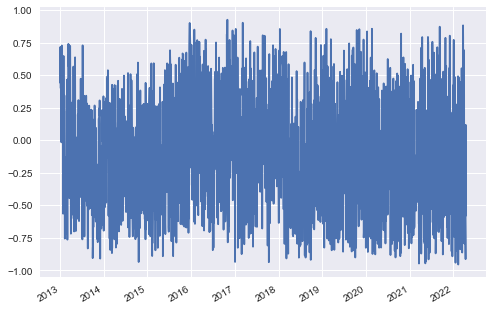

<AxesSubplot:>

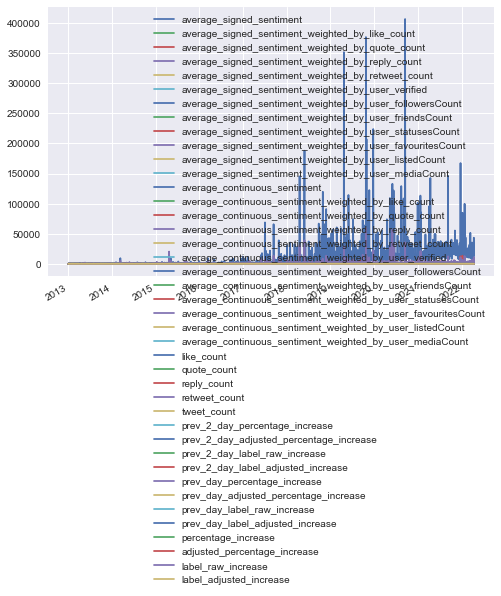

In [19]:
a = twitter[feature_cols[10]]

a.plot()
plt.show()

twitter.plot()

In [81]:
feature_cols = twitter.keys()

#feature_matrix = twitter[feature_cols[0:23]]
feature_matrix = twitter[twitter.columns[0:-4]]
print(feature_matrix.shape)

average = np.average(feature_matrix, axis=0)
variance = np.std(feature_matrix, axis=0)
scaled_matrix = (feature_matrix-average)/variance


# ones_col = np.ones(len(scaled_matrix.average_continuous_sentiment_weighted_by_like_count))
# X = np.column_stack((ones_col, scaled_matrix))

X = scaled_matrix
y = twitter['label_raw_increase']

(2339, 37)


[Text(0.5, 1.0, 'F1 for each variable')]

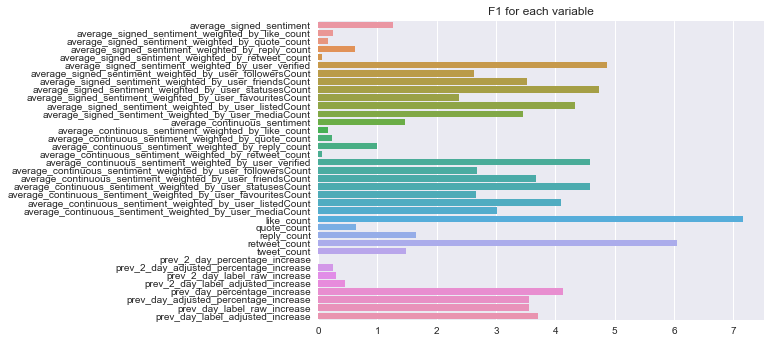

In [82]:
F_values = f_classif(X, y)

#result2 = SelectKBest(f_regression, k=10).fit_transform(X, y)
keys = twitter.keys().to_numpy()[0:-4]
values = np.reshape(F_values[0], newshape=(len(keys),))
#df = pd.DataFrame(values, columns=keys)
#print(keys)

highest_features = ['average_continuous_sentiment_weighted_by_quote_count', 'like_count', 'retweet_count', 'prev_2_day_label_adjusted_increase']

sns.barplot(y=keys, x=values).set(title='F1 for each variable')

In [98]:
select = SelectKBest(score_func = f_classif, k=20)
z = select.fit_transform(X, y)

print(z)

[[ 1.41021194  1.45812554  0.48078146 ...  0.6811378   0.99445743
   0.98514664]
 [ 1.32221259  1.65978628  1.60601741 ...  0.26307705  0.99445743
   0.98514664]
 [-0.69204426  1.65482605  1.22771749 ... -0.42865811 -1.00557346
  -1.01507731]
 ...
 [-2.01160354 -1.67016444 -0.46746984 ...  0.45173406 -1.00557346
   0.98514664]
 [ 0.49052371  0.7000746  -0.00778537 ... -0.03406641 -1.00557346
  -1.01507731]
 [-1.33606738 -1.07106516 -0.572386   ...  1.0482586   0.99445743
   0.98514664]]


<AxesSubplot:>

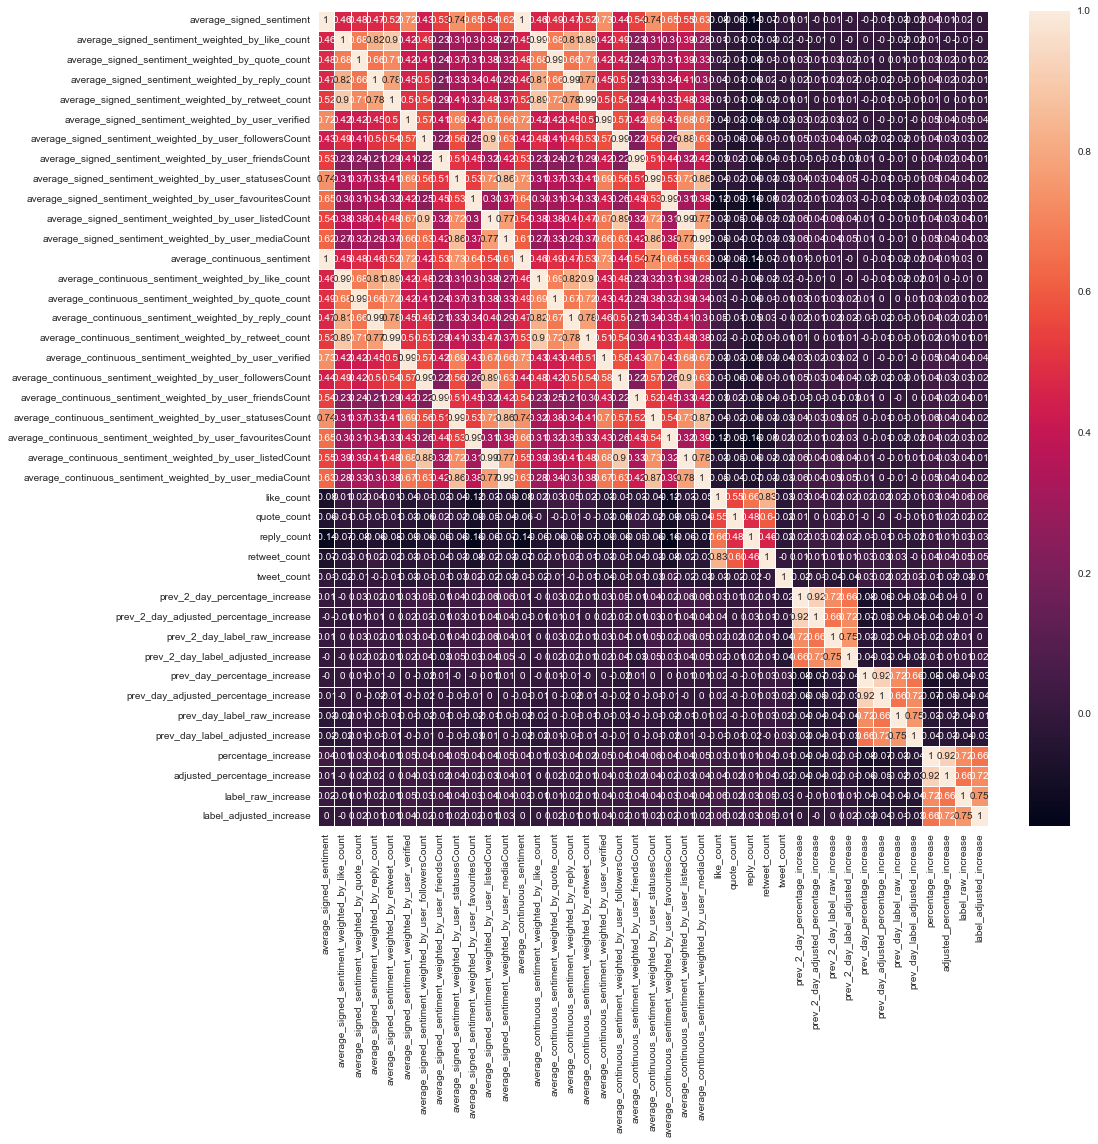

In [83]:
#plots 
plt.style.use("seaborn")
plt.figure(figsize = (15,15))

correlation = twitter.corr().applymap(lambda x: round(x,2))

sns.heatmap(correlation, annot=True, linewidth=1)

In [165]:
def log_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2)

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    # Use score method to get accuracy of model
    score = logreg.score(X_test, y_test)
    return score

In [167]:
accuracy = 0
for i in range(100):
    accuracy += log_reg(z,y)
    
print(accuracy/100)



0.5082051282051284


In [137]:
np.mean(y_test)

0.5299145299145299

In [170]:
accuracy = 0
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg = LinearRegression()

    linreg.fit(X_train, y_train)
    accuracy += linreg.score(X_test, y_test)

    
print(accuracy/100)

-0.019091679657649917


In [185]:
def svm21(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Create a svm Classifier
    clf = svm.SVC(kernel='rbf') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy: how often is the classifier correct?
    return metrics.accuracy_score(y_test, y_pred)

In [189]:
accuracy = 0
for i in range(100):
    accuracy += svm21(X,y)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy/100)

Accuracy: 0.5037179487179487


In [141]:
#Create a svm Classifier
rbf = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rbf.predict(X_test)

In [142]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5256410256410257


[[117 103]
 [140 108]]


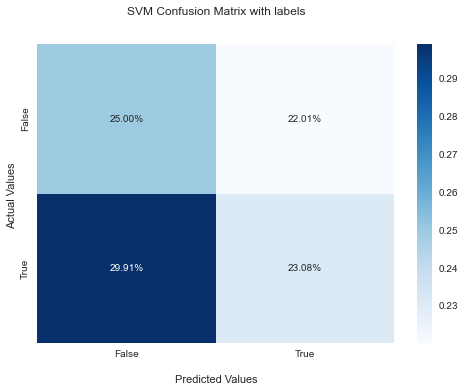

In [190]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# heatmap with percentage of True Positives, False Positives, False Negatives, and True negatives
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [144]:
#neural networks

from keras.layers import Dense, Dropout 

from keras.models import Sequential

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the model
model = Sequential()

# Input Layer
model.add(Dense(37, activation = "relu", input_shape=(37, )))

# Hidden Layers
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(40, activation = "relu"))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(20, activation = "relu"))

# Output Layer
model.add(Dense(1, activation = "sigmoid"))
model.summary()

# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 X_train, y_train,
 epochs= 30,
 batch_size = 256,
 validation_data = (X_test, y_test)
)

print()
print("Accuracy on the test set:", np.mean(results.history["val_accuracy"]))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 37)                1406      
_________________________________________________________________
dropout_34 (Dropout)         (None, 37)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 40)                1520      
_________________________________________________________________
dropout_35 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 21        
Total params: 3,767
Trainable params: 3,767
Non-trainable params: 0
___________________________________________________

The batch size defines the number of samples that will be back propagated through the network and an epoch is an iteration over the entire training data.
In general, a larger batch size results in faster training, but doesn't always converge as fast. 
A smaller batch size is slower in training but it can converge faster. 

In [198]:
 all_tweets_analyzed = pd.read_csv('all_tweets_analyzed.csv', index_col=0, parse_dates=True)

In [200]:
np.mean(all_tweets_analyzed, axis=0)

signed_sentiment            -0.016364
continuous_sentiment        -0.017674
like_count                  95.582698
quote_count                  1.655077
reply_count                  5.280601
retweet_count               14.118467
user_verified                0.229583
user_followersCount     451531.417211
user_friendsCount         3711.687734
user_statusesCount       74494.660390
user_favouritesCount     31141.657764
user_listedCount          3058.727024
user_mediaCount          16415.434905
dtype: float64

<AxesSubplot:xlabel='like_count', ylabel='Count'>

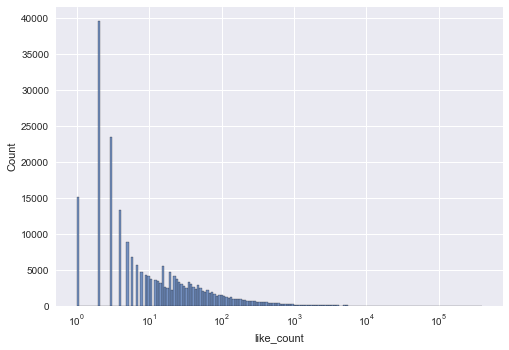

In [215]:
sns.histplot(all_tweets_analyzed['like_count']+1, log_scale=True)

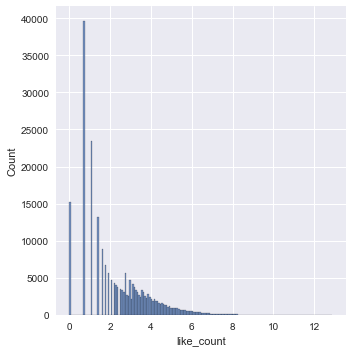

In [217]:
sns.displot(np.log(all_tweets_analyzed['like_count']+1))

In [202]:
np.mean(twitter, axis=0)

average_signed_sentiment                                           -0.020313
average_signed_sentiment_weighted_by_like_count                     0.116881
average_signed_sentiment_weighted_by_quote_count                   -0.020359
average_signed_sentiment_weighted_by_reply_count                   -0.040702
average_signed_sentiment_weighted_by_retweet_count                  0.068260
average_signed_sentiment_weighted_by_user_verified                 -0.077076
average_signed_sentiment_weighted_by_user_followersCount           -0.054027
average_signed_sentiment_weighted_by_user_friendsCount              0.042715
average_signed_sentiment_weighted_by_user_statusesCount            -0.130881
average_signed_sentiment_weighted_by_user_favouritesCount          -0.040693
average_signed_sentiment_weighted_by_user_listedCount              -0.126984
average_signed_sentiment_weighted_by_user_mediaCount               -0.111617
average_continuous_sentiment                                       -0.021578